f(0.129) = 0.8245230769858085
f(0.167) = 0.814035567928481


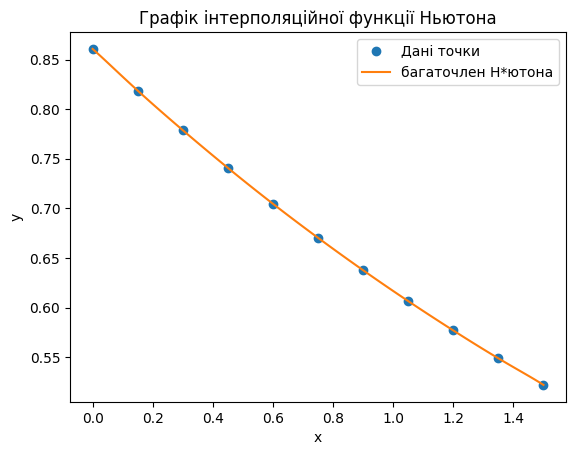

In [2]:
import numpy as np
from math import factorial 
import matplotlib.pyplot as plt 
 
# задані точки 
x = np.array([i * 0.15 for i in range(0, 11)])   
y = np.array([0.8607,0.8187,0.7788,0.7408,0.7046,0.6703,0.6376,0.6065,0.5769,0.5488,0.5220]) 
 
# перша інтерполяційна формула 
def first_interpolation(x, y, x0): 
    n = len(x) 
    f = np.zeros((n, n)) 
    f[:, 0] = y 
    for j in range(1, n): 
        for i in range(n - j): 
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i]) 
    ans = 0 
    for j in range(n): 
        prod = f[0, j] 
        for i in range(j): 
            prod *= (x0 - x[i]) 
        ans += prod 
    return ans 
 
def second_interpolation(x, y, x0): 
    n = len(x) 
    f = np.zeros((n, n)) 
    f[:, 0] = y 
    for j in range(1, n): 
        for i in range(n - j): 
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i]) 
    ans = f[0, 0] 
    for j in range(1, n): 
        prod = f[0, j] 
        for i in range(j): 
            prod *= (x0 - x[i]) 
        ans += prod 
    return ans 
 
# обчислюємо значення функції в точках x = 0.1 та x = 0.9 
x1 = 0.129
x2 = 0.167 
y1 = first_interpolation(x, y, x1) 
y2 = second_interpolation(x, y, x2) 
print(f"f({x1}) = {y1}") 
print(f"f({x2}) = {y2}") 
 
xx = np.linspace(np.min(x), np.max(x), 100) 
yy = np.zeros_like(xx) 
for i in range(len(xx)): 
    yy[i] = second_interpolation(x, y, xx[i]) 
 
plt.plot(x, y, 'o', label='Дані точки') 
plt.plot(xx, yy, label='багаточлен Н*ютона') 
plt.title("Графік інтерполяційної функції Ньютона") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.legend() 
plt.show()
